1.0


<IPython.core.display.Javascript object>


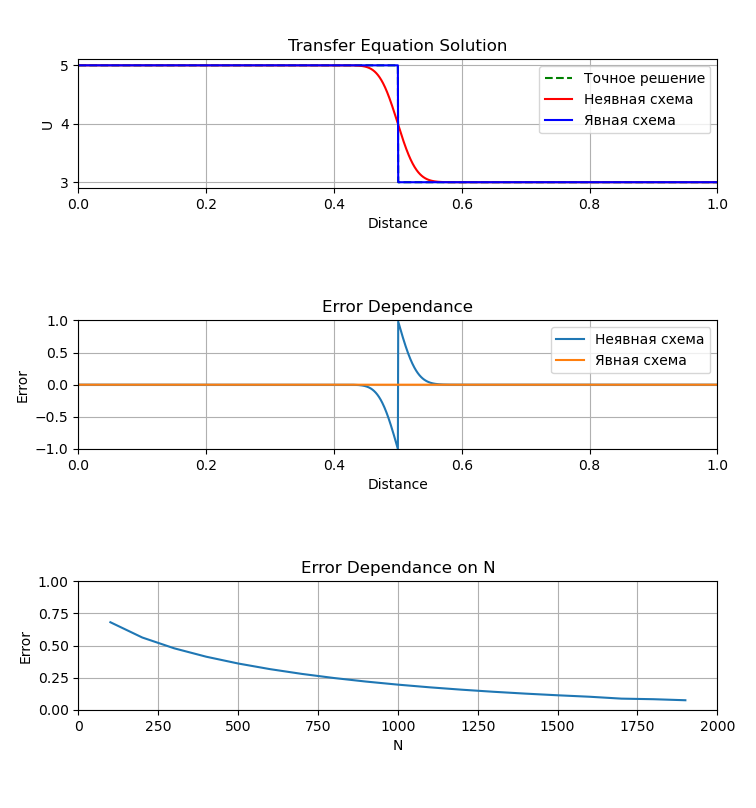

In [69]:
from matplotlib.pyplot import *
import numpy as np
%matplotlib notebook
# dont forget N/Nx = 1/2


N = 50
Nx = 100
m = 100
Max = 2000

H = 1
T = 1

a = 0.5
h =  H / Nx
t = T / N

d = a * t / h
print(d)
X = np.arange(0, H, h)
Y = np.arange(0, 10, h)

# Data arrays
M = [] 
Up = [0] * len(X)

U = [3] * len(X)
U[0] = 5

U1 = [3] * len(X)
U1[0] = 5

U2 = [3] * len(X)
U2[0] = 5

# Errors arrays

E1 = [0] * len(X) 
E2 = [0] * len(X)
E = []

subplot(311)
axis([0, 1, 2.9, 5.1])

xlabel('Distance')
ylabel('U')
title('Transfer Equation Solution')
grid()

ln1, = plot(X, Up, 'g--', label = 'Точное решение')
ln2, = plot(X, U1, 'r-', label = 'Неявная схема')
ln3, = plot(X, U2, 'b-', label = 'Явная схема')
tight_layout()
legend()


subplot(312)
axis([0, 1, -1, 1])

xlabel('Distance')
ylabel('Error')
title('Error Dependance')
grid()

ln4, = plot(X, E1, label = 'Неявная схема')
ln5, = plot(X, E2, label = 'Явная схема')
tight_layout()
legend()

subplot(313)
axis([0, Max, 0, 1])

xlabel('N')
ylabel('Error')
title('Error Dependance on N')
grid()

ln6, = plot(M, E)
tight_layout()

def real(Nx):
    
    for i in range(Nx):
        
        if X[i] <= a * T:
            Up[i] = 5
            
        else:
            Up[i] = 3
            
    ln1.set_data(X, Up)
    
    return Up


def implicit(Nx, Up1):
    
    
    for time in np.arange(0, T, 2 * T / Nx):

        U = np.copy(U1)

        for i in range(1, Nx):
            U1[i] = 1 / (1 + d) * (U[i] + d * U1[i-1])

        ln2.set_data(X, U1)
        #gcf().canvas.draw()

        y = 0
        U1[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E1[j] = (U1[j] - Up1[j])
        ln4.set_data(X, E1)
    M.append(Nx)
    E.append(abs(E1[int(Nx/2) - int(Nx/25)]))
    ln6.set_data(M, E)
     
    return 0
   
    
def explicit(Nx, Up1):
    
    for time in np.arange(0, T, 2*T/Nx):
        
        U = np.copy(U2)
        
        for i in range(1, Nx):
            U2[i] = U2[i] + d * (U[i-1] - U[i])
            
        ln3.set_data(X,U2)
        #gcf().canvas.draw()

        y = 0
        U2[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E2[j] = abs(U2[j] - Up1[j])   
        ln5.set_data(X, E2)
     
    return 0


#implicit()



for m in range(100, Max, 100):
    
    X = np.arange(0, H, H / m)
    
    d = 1
    
    Up = [0] * len(X)
    
    U = [3] * len(X)
    U[0] = 5

    U1 = [3] * len(X)
    U1[0] = 5
    
    U2 = [3] * len(X)
    U2[0] = 5

    
    E1 = [0] * len(X)
    E2 = [0] * len(X)
    
    real(m)
    implicit(m, Up)
    explicit(m, Up)
    gcf().canvas.draw()